# **Mchezopesa Ltd Football Analysis and Prediction**
# Defining the Question.
a) Specifying the Question
Football match prediction based on Home Team and away Team, the type of the tourament ie Friendly, Fifa World Cup etc and the Rank of the team
Approaches to be used:

Approach 1: Polynomial approach What to train given the :

Rank of home team

Rank of away team

tournament Type

Model 1: Predict how many goals the home team scores
 
Model 2: Predict how many goals the away team scores

Approach 2 Logistic approach

# Feature Engineering: 
Figure out from the home team’s outcome; ie. if the game is a Win, Lose or Draw 

b) Defining the Metric for Success
Merging the two datasets, Perform Polynomial Regression and compare to the RMSE score, Logistic Regression

# c) Understanding the context
The data contains two datasets with the ranking of the teams from 1993 to 2019 and the results between two teams within the same period.The results includes the scores that they won either at their home country or away.

Task to predict the output of the matches to be played in the near future

# d) Recording the Experimental Design
Understand the data, Clean the data, Explore the data, Train the model, Test the model, Evaluate performance of the Model

In [0]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn libraries
import seaborn as sns


# Import sklearn linear_model libraries 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score 

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [0]:
# Loading the Dataset
fifa_ranks = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')


In [398]:
fifa_ranks.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [399]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [400]:
print('Unique countries in fifa ranks dataset: ', len(fifa_ranks['country_full'].unique()))
print('Unique countries in results dataset: ', len(results['country'].unique()))

Unique countries in fifa ranks dataset:  216
Unique countries in results dataset:  266


In [401]:

# Determining the number of records in our datasets
print("Fifa Ranking: ", fifa_ranks.shape)
print("Fifa Results: ", results.shape)

Fifa Ranking:  (57793, 16)
Fifa Results:  (40839, 9)


In [402]:
#checking for fifa_ranks data types
fifa_ranks.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [403]:
#checking for results data types
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

Both datasets have dates attributes as object...Lets change it to date data type

In [0]:
#changing to date time datatype
fifa_ranks['rank_date'] =  fifa_ranks['rank_date'].apply(pd.to_datetime)
results['date'] =  results['date'].apply(pd.to_datetime)


In [405]:
#rechecking to confirmed, they have been updated
fifa_ranks['rank_date'].dtype

dtype('<M8[ns]')

In [406]:
#rechecking to confirmed, they have been updated
results['date'].dtype

dtype('<M8[ns]')

In [407]:
#Describe fif_ranks date
fifa_ranks['rank_date'].describe()

count                   57793
unique                    286
top       2016-12-22 00:00:00
freq                      211
first     1993-08-08 00:00:00
last      2018-06-07 00:00:00
Name: rank_date, dtype: object

In [408]:

#Describe results date
results['date'].describe()

count                   40839
unique                  15115
top       2012-02-29 00:00:00
freq                       66
first     1872-11-30 00:00:00
last      2019-07-20 00:00:00
Name: date, dtype: object

In [409]:

# Drop the date records
results.drop(results[results['date'] < '1993-01-01'].sort_values(by ='date' ,ascending = False).index,inplace = True)
results.shape

(23478, 9)

In [410]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False


In [0]:

# split the datetime column into month and year for both assistants
results['year'], results['month'],results['day'] = results['date'].dt.year, results['date'].dt.month, results['date'].dt.day


In [412]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,1,1
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993,1,2
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,1993,1,2
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993,1,3
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,1993,1,3


In [0]:
fifa_ranks['year'], fifa_ranks['month'], fifa_ranks['day'] = fifa_ranks['rank_date'].dt.year, fifa_ranks['rank_date'].dt.month,fifa_ranks['rank_date'].dt.day


In [414]:
fifa_ranks.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8


In [415]:

#merge the two datasets
merged_fifa=pd.merge( fifa_ranks,results, left_on=['country_full','year','month'], right_on=['home_team','year','month'],how='inner')
merged_fifa.head()

#rename the rank column
merged_fifa.rename({'rank' : 'home_team_rank'}, axis = 1, inplace = True)
merged_fifa.head()

,home_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,11
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False,22
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,29
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8


In [416]:
# create a another dataset to allow creating an away team rank
new_merged=pd.merge(fifa_ranks,results, left_on=['country_full','year','month'], right_on=['away_team','year','month'],how='inner')


new_merged.rename({'rank' : 'away_team_rank'}, axis = 1, inplace = True)
new_merged.head()



,away_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y
0,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,11
1,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,15
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1


In [417]:
print(merged_fifa.shape)
print(new_merged.shape)

(18609, 29)
(18526, 29)


In [418]:
#get the row with away team rank
data = new_merged[['away_team_rank','year','month','away_team']]
data

,away_team_rank,year,month,away_team
0,3,1993,8,Switzerland
1,5,1993,8,Argentina
2,5,1993,8,Argentina
3,5,1993,8,Argentina
4,8,1993,8,Brazil
...,...,...,...,...
18521,139,2018,6,Botswana
18522,139,2018,6,Botswana
18523,155,2018,6,Mauritius
18524,163,2018,6,Belize


In [419]:
fifa =pd.merge( merged_fifa,data, left_on=['away_team','year','month'], right_on=['away_team','year','month'],how='inner')
fifa.head()


,home_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y,away_team_rank
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,11,3
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False,22,12
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22,70
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22,70
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22,70


In [420]:
fifa.shape

(28518, 30)

# **Exploring the Data**

In [421]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28518 entries, 0 to 28517
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   home_team_rank           28518 non-null  int64         
 1   country_full             28518 non-null  object        
 2   country_abrv             28518 non-null  object        
 3   total_points             28518 non-null  float64       
 4   previous_points          28518 non-null  int64         
 5   rank_change              28518 non-null  int64         
 6   cur_year_avg             28518 non-null  float64       
 7   cur_year_avg_weighted    28518 non-null  float64       
 8   last_year_avg            28518 non-null  float64       
 9   last_year_avg_weighted   28518 non-null  float64       
 10  two_year_ago_avg         28518 non-null  float64       
 11  two_year_ago_weighted    28518 non-null  float64       
 12  three_year_ago_avg       28518 n

# **Data Cleaning**

In [422]:
#checking for null values
fifa.isnull().sum()

home_team_rank             0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
year                       0
month                      0
day_x                      0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
day_y                      0
away_team_rank             0
dtype: int64

In [423]:
#checking for sum of the duplicated values
fifa.duplicated().sum()

11614

In [0]:
#drop the duplicates, keep the first instance of the duplicates
fifa.drop_duplicates(keep = 'first', inplace = True)

In [425]:
#crosschecking for any duplicates
fifa.duplicated().sum()

0

In [426]:
#rechecking for the new shape of the dataset
fifa.shape

(16904, 30)

# **Checking for outliers**

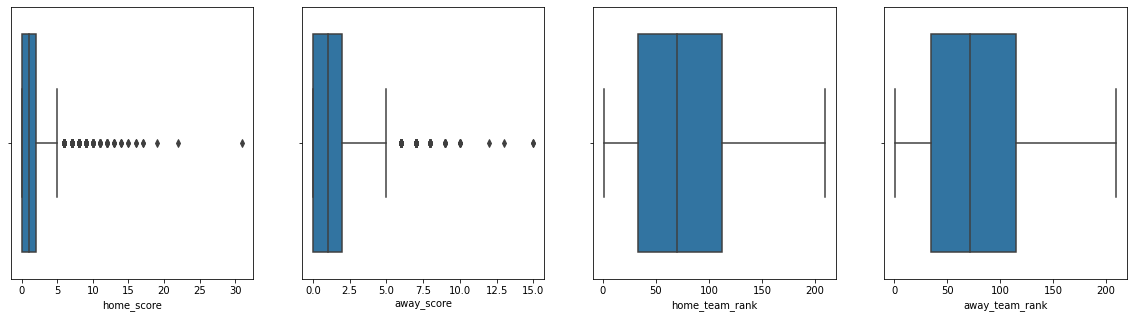

In [427]:
# specify the variable i want to check for ouliers in a list
outliers = ['home_score', 'away_score','home_team_rank', 'away_team_rank']

# specify the number of columns and rows we want in the boxplots.
fig, axes = plt.subplots(ncols = 4, figsize=(20,5))


# a function to loop over the given multiple features to give  the boxplot of the outliers 
for ax, data,column in zip(axes.flatten(),fifa,outliers):
  sns.boxplot(fifa[column],ax=ax)

The ouliers are not so many, hence i will not exlude them since they may affect our ranking

# **Exploratory Data Analysis**

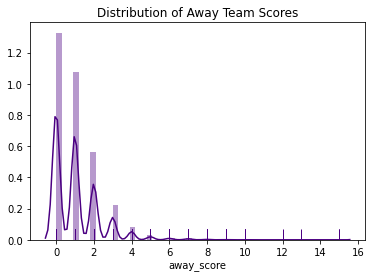

In [428]:
sns.distplot(fifa["away_score"],color="indigo",rug=True)
plt.title("Distribution of Away Team Scores",color='black')
plt.show()


skewed to the right

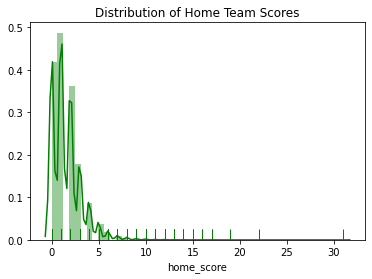

In [429]:
sns.distplot(fifa['home_score'], color= 'green', rug = True)
plt.title("Distribution of Home Team Scores",color='black')
plt.show()

In [0]:
skewed to the right

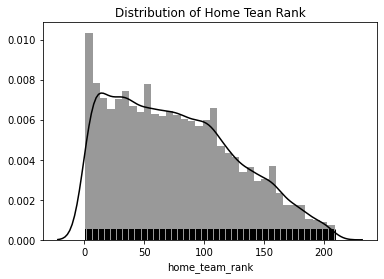

In [430]:
sns.distplot(fifa['home_team_rank'], color= 'black', rug = True)
plt.title("Distribution of Home Tean Rank",color='black')
plt.show()

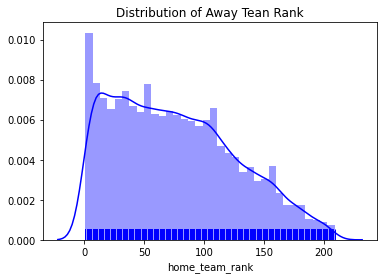

In [431]:
sns.distplot(fifa['home_team_rank'], color= 'blue', rug = True)
plt.title("Distribution of Away Tean Rank",color='black')
plt.show()

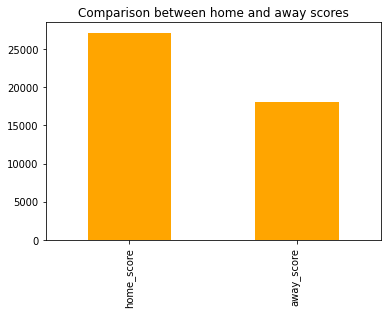

In [432]:
fifa[['home_score', 'away_score']].sum().plot.bar( color = 'orange')
plt.title('Comparison between home and away scores')
plt.show()

Majority of the team playing at home scored many goals. This could be as a result of factors such as  being comfortable, the weather farmiliarity etc...

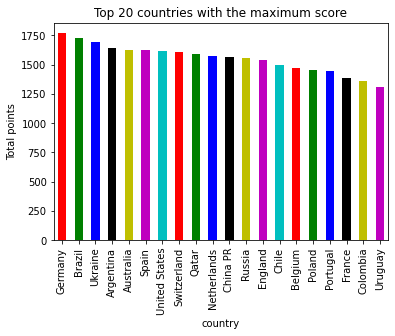

In [433]:


fig, ax = plt.subplots()

plt.title('Top 20 countries with the maximum score')
plt.ylabel('Total points')





fifa['total_points'].groupby(fifa['country']).max().sort_values(ascending = False).head(20).plot(kind = 'bar', color= list('rgbkymc'))

plt.show()


Germany has the max total points

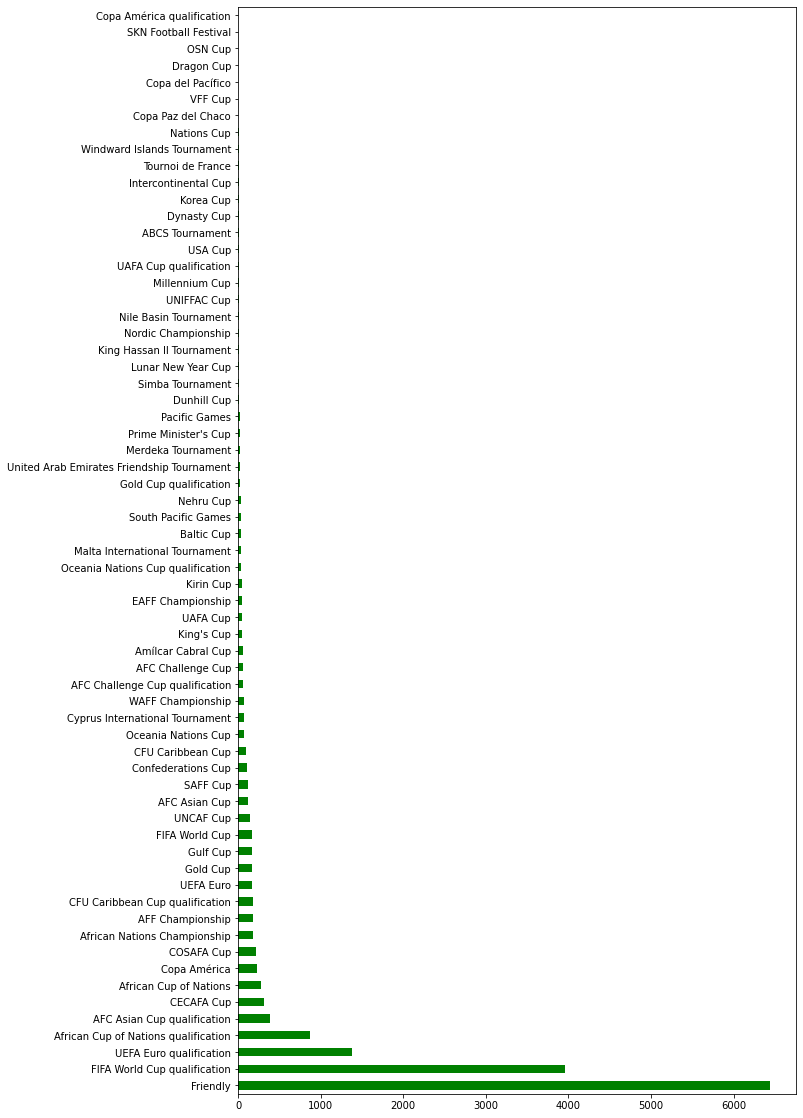

In [434]:
fig, ax = plt.subplots(figsize=(10, 20))



fifa['tournament'].value_counts().sort_values(ascending = False ).plot(kind='barh', color = 'green')

friendly matches are the most common

In [0]:

# Classify result as win , loss or draw from home team's perspective.

def categorize_result(home_score,away_score):
  goal_diff = home_score - away_score
  if goal_diff > 0:
    return 'Win'
  elif goal_diff < 0:
    return 'Loss'
  else:
    return 'Draw'

#Home outcome result
fifa['home_result_outcome'] = fifa.apply(lambda x: categorize_result(x['home_score'],x['away_score']),axis =1)

#preview the dataset
#fifa.head()

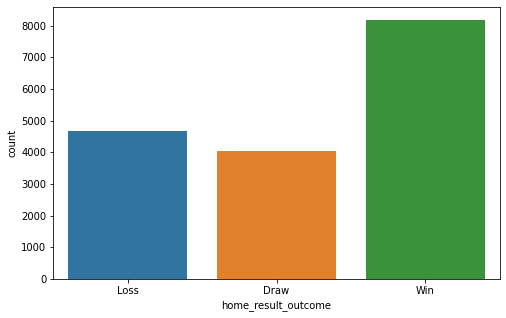

In [436]:
# Visualizing the results  for win, loss and draw

plt.figure(figsize=(8,5))
sns.countplot(x='home_result_outcome',data=fifa)

A good percentage of the home team won

# **Data Modelling**

In [437]:
#prediction data

pred_data= fifa[['home_team_rank','away_team_rank','home_team', 'away_team', 'home_score','away_score','tournament','home_result_outcome']]
print(pred_data.shape)
pred_data.head()

(16904, 8)


,home_team_rank,away_team_rank,home_team,away_team,home_score,away_score,tournament,home_result_outcome
0,4,3,Sweden,Switzerland,1,2,Friendly,Loss
1,4,12,Sweden,France,1,1,FIFA World Cup qualification,Draw
2,5,70,Argentina,Peru,2,1,FIFA World Cup qualification,Win
5,19,70,Colombia,Peru,4,0,FIFA World Cup qualification,Win
8,67,70,Paraguay,Peru,2,1,FIFA World Cup qualification,Win


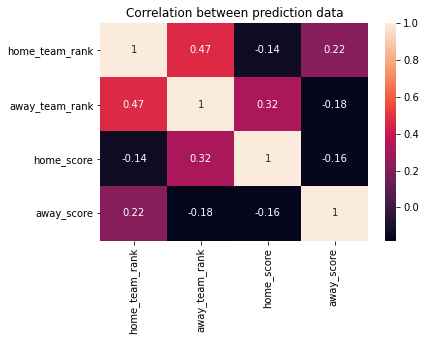

In [438]:
sns.heatmap(pred_data.corr(), annot = True)
plt.title('Correlation between prediction data')
plt.show()

independent variables are not close to one, hence they have passed the test for independence

# **Approach 1 : Polynomial approach**
What to train given:

Rank of home team Rank of away team Tournament type

*  Model 1: Predict how many goals the home team scores.
*  Model 2: Predict how many goals the away team scores.








In [439]:

# label encoding the categorical variables

le = LabelEncoder()
pred_data['tournament_code'] = le.fit_transform(pred_data['tournament'])
pred_data.head()

,home_team_rank,away_team_rank,home_team,away_team,home_score,away_score,tournament,home_result_outcome,tournament_code
0,4,3,Sweden,Switzerland,1,2,Friendly,Loss,27
1,4,12,Sweden,France,1,1,FIFA World Cup qualification,Draw,26
2,5,70,Argentina,Peru,2,1,FIFA World Cup qualification,Win,26
5,19,70,Colombia,Peru,4,0,FIFA World Cup qualification,Win,26
8,67,70,Paraguay,Peru,2,1,FIFA World Cup qualification,Win,26


In [0]:
# features and labels
X = pred_data[['away_score', 'tournament_code','home_team_rank','away_team_rank']].values
y = pred_data['home_score']

In [0]:

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [442]:
# Fit Linear Regression model 
regressor = LinearRegression()
regressor.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [443]:
pol_reg = PolynomialFeatures(degree = 2)
X_train_poly = pol_reg.fit_transform(X_train)
X_test_poly = pol_reg.fit_transform(X_test)
pol_reg.fit(X_train_poly, y_train)

pol_regressor = LinearRegression()
pol_regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [444]:

# making predictions 
y_pred = np.round(pol_regressor.predict(X_test_poly),3)
y_pred

array([1.429, 1.11 , 1.147, ..., 2.706, 1.575, 1.019])

In [445]:
#compare the results of the predicted with the actual results 
comparison = pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(comparison.head())
comparison.describe()

       Actual  Predicted
8243        1      1.429
27978       0      1.110
18416       2      1.147
10165       2      2.767
17679       0      0.534


,Actual,Predicted
count,3381.000000,3381.000000
mean,1.542147,1.608875
std,1.552555,0.746952
min,0.000000,-1.691000
25%,0.000000,1.115000
50%,1.000000,1.491000
75%,2.000000,1.951000
max,15.000000,5.875000


In [446]:
#getting the mean of the label
pred_data['home_score'].mean()

1.6039990534784667

In [447]:

# Compute the Error rate
print('Root Mean Squared Error:', np.sqrt((metrics.mean_squared_error(y_test,y_pred))))

Root Mean Squared Error: 1.3784930507976123



The model has an RMSE of 1.3785 . This shows the model is not accurate since it is above 10% of the mean of the label


# Residual plots and Heteroskedasticity Testing 

In [448]:

# get the residual
residuals = np.subtract(y_pred, y_test)



# statistical description
residual = pd.DataFrame(residuals).describe()

print(residual)
# mean 
print ("\nMean :", residuals.mean())

        home_score
count  3381.000000
mean      0.066727
std       1.377081
min     -12.035000
25%      -0.593000
50%       0.287000
75%       0.984000
max       4.352000

Mean : 0.06672729961549836


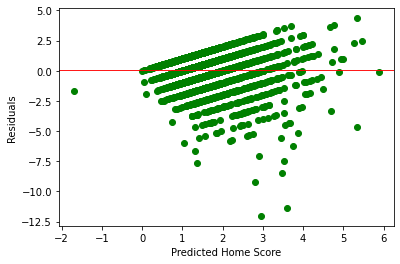

In [449]:
# residual plot of actual vs predicted
plt.scatter(y_pred, residuals, color = 'green')
plt.ylabel('Residuals')
plt.xlabel('Predicted Home Score')
plt.axhline(y = residuals.mean(), color = 'red', linewidth = 0.9)
plt.show()

majority of the residuals are not centered around the mean

# **Barlett's Test**
The test establishes as a null hypothesis that the variance is equal for all  datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [450]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# computing the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("The variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")

The variances are homogeneous!


# **Model 2: Predict how many goals the away team scores.**

In [0]:
pred_data2 = pred_data[['home_score','away_score','tournament','home_team_rank','away_team_rank', 'tournament_code']]

In [0]:

# obtaining the features and the label
X = pred_data2[['home_score', 'tournament_code','home_team_rank','away_team_rank']].values
y = pred_data2['away_score']

# **Variance Inflation Factor (VIF)**

In [453]:

x1 = X.copy()
x1 = pd.DataFrame(x1,columns=['home_score', 'tournament_code','home_rank','away_rank'])
x1

,home_score,tournament_code,home_rank,away_rank
0,1,27,4,3
1,1,26,4,12
2,2,26,5,70
3,4,26,19,70
4,2,26,67,70
...,...,...,...,...
16899,1,10,129,94
16900,0,14,137,123
16901,6,14,139,155
16902,0,14,147,118


In [454]:

from sklearn.preprocessing import Normalizer
correlation = x1.corr()

#Compute the VIF
vif_data = pd.DataFrame(np.linalg.inv(correlation.values), index  = correlation.index, columns = correlation.columns)
vif_data

,home_score,tournament_code,home_rank,away_rank
home_score,1.259110,-0.012102,0.459501,-0.618478
tournament_code,-0.012102,1.032601,0.091677,0.123133
home_rank,0.459501,0.091677,1.459321,-0.816964
away_rank,-0.618478,0.123133,-0.816964,1.599787



home_score has a score of 1.259 , home_rank score of 1.459, tournament_code = 1.032 and away_rank score of 1.5998 all of the points are below 5 hence no colinearity between the variables.

This means we will not drop any independent variables for our prediction

In [0]:

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [456]:

regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [457]:

pol_reg = PolynomialFeatures(degree = 2)
X_train_poly = pol_reg.fit_transform(X_train)
X_test_poly = pol_reg.fit_transform(X_test)
pol_reg.fit(X_train_poly, y_train)

pol_regressor = LinearRegression()
pol_regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:

# making predictions 
y_pred = pol_regressor.predict(X_test_poly)

In [459]:

#compare the results of the predicted with the actual results in the y-test data
comparison2 = pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(comparison2.head())
comparison2.describe()

       Actual  Predicted
8243        1   0.974280
27978       0   1.165577
18416       1   1.225494
10165       0   0.417472
17679       2   2.233886


,Actual,Predicted
count,3381.000000,3381.000000
mean,1.059154,1.061193
std,1.209451,0.517098
min,0.000000,-0.134822
25%,0.000000,0.702446
50%,1.000000,0.987417
75%,2.000000,1.300258
max,15.000000,4.444055


In [460]:
# We compute RMSE to see the Error rate
print('Root Mean Squared Error:', np.sqrt((metrics.mean_squared_error(y_test,y_pred))))

Root Mean Squared Error: 1.1148426997307104



The model has an RMSE of 1.1148 . This shows the model is not accurate and can not be used to make predictions


# **Approach 2: Logistic approach**

In [0]:
# a function to convert tournament type to world Cup, Friendly and other 
def tournament(z): 
    if (z == 'Friendly'):
        return 'Friendly'
    elif (z == 'FIFA World Cup qualification') or (z == 'FIFA World Cup') :
        return 'World cup'
    else:
        return 'Other'

In [0]:
pred_data['tournament_type'] = pred_data.tournament.apply(lambda x: tournament(x))

In [463]:

#Preview the dataset
pred_data.head()

,home_team_rank,away_team_rank,home_team,away_team,home_score,away_score,tournament,home_result_outcome,tournament_code,tournament_type
0,4,3,Sweden,Switzerland,1,2,Friendly,Loss,27,Friendly
1,4,12,Sweden,France,1,1,FIFA World Cup qualification,Draw,26,World cup
2,5,70,Argentina,Peru,2,1,FIFA World Cup qualification,Win,26,World cup
5,19,70,Colombia,Peru,4,0,FIFA World Cup qualification,Win,26,World cup
8,67,70,Paraguay,Peru,2,1,FIFA World Cup qualification,Win,26,World cup


In [464]:

#Create new dataframe with the columns required for this approach
logistic_data = pred_data[['away_team_rank','home_team_rank','away_score','home_score','home_team','away_team','tournament_type','home_result_outcome']]
logistic_data.head()

,away_team_rank,home_team_rank,away_score,home_score,home_team,away_team,tournament_type,home_result_outcome
0,3,4,2,1,Sweden,Switzerland,Friendly,Loss
1,12,4,1,1,Sweden,France,World cup,Draw
2,70,5,1,2,Argentina,Peru,World cup,Win
5,70,19,0,4,Colombia,Peru,World cup,Win
8,70,67,1,2,Paraguay,Peru,World cup,Win


In [465]:

#encode  tournament type and home_result_outcome
lb = LabelEncoder()
logistic_data['tournament_type'] = lb.fit_transform(logistic_data['tournament_type'])
logistic_data['home_result_outcome'] = lb.fit_transform(logistic_data['home_result_outcome'])

logistic_data.head()

,away_team_rank,home_team_rank,away_score,home_score,home_team,away_team,tournament_type,home_result_outcome
0,3,4,2,1,Sweden,Switzerland,0,1
1,12,4,1,1,Sweden,France,2,0
2,70,5,1,2,Argentina,Peru,2,2
5,70,19,0,4,Colombia,Peru,2,2
8,70,67,1,2,Paraguay,Peru,2,2


In [466]:

#dataframe for logistic regression
log_data= logistic_data[['home_score','away_score','home_team_rank','away_team_rank','tournament_type','home_result_outcome']]
log_data.head()

,home_score,away_score,home_team_rank,away_team_rank,tournament_type,home_result_outcome
0,1,2,4,3,0,1
1,1,1,4,12,2,0
2,2,1,5,70,2,2
5,4,0,19,70,2,2
8,2,1,67,70,2,2


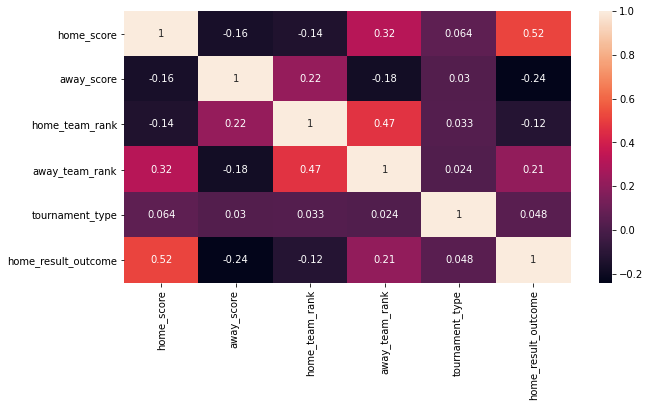

In [467]:

#Plot the correlation
plt.figure(figsize = (10,5))
sns.heatmap(log_data.corr(), annot=True)
plt.show()

In [0]:
X = log_data[['home_score','away_score','home_team_rank','away_team_rank','tournament_type']].values
y = log_data['home_result_outcome']

In [0]:

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [470]:
# fitting the model
log_Reg = LogisticRegression()
log_Reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:

# making prediction
y_pred = log_Reg.predict(X_test)

In [472]:

# making comparison
comparison = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comparison.head()

,Actual,Predicted
9346,1,1
6380,1,1
27191,2,2
18346,1,1
8720,0,0


In [473]:

comparison.describe()

,Actual,Predicted
count,3381.000000,3381.000000
mean,1.248447,1.248447
std,0.812131,0.812131
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,2.000000,2.000000


In [474]:

# evaluating the model
confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion_matrix','\n',confusion_matrix)

Confusion_matrix 
 [[ 799    0    0]
 [   0  943    0]
 [   0    0 1639]]



# **Conclusion**
The model has 100% accuracy, which  is not a good thing. This is what is called overfitting.

# **Recommendation**
More features can be included to train the model .

Another alternative is to use other classifiers to see if the accuracy will change

In the mean time,  current ranking  would be used to make near future predictions